# Data Homework: Chapter 9

Name:<u> Enter your full name here

Directions: Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=pUBb) using pandas_datareader.

>Real Potential GDP: GDPPOT
>
>Potential GDP: NGDPPOT
>
>Real GDP: GDPC1
>
>Consumption: PCEC
>
>Investment: GPDI
>
>Government Spending: FGEXPND
>
>Federal Debt: GFDEBTN
>
>Nominal GDP: GDP


In [1]:
import datetime
from datlib.FRED import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Real Potential GDP": "GDPPOT",
               "Potential GDP": "NGDPPOT",
               "Real GDP": "GDPC1",
               "Consumption": "PCEC",
               "Investment": "GPDI",
               "Federal Spending": "FGEXPND",
               "Federal Debt": "GFDEBTN",
               "Nominal GDP": "GDP",
               "GDP Deflator": "GDPDEF",
               "10 Year U.S. Treasury Rate":"DGS10"}
# Select start and end dates
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "Q")
data

,Real Potential GDP,Potential GDP,Real GDP,Consumption,Investment,Federal Spending,Federal Debt,Nominal GDP,GDP Deflator,10 Year U.S. Treasury Rate
DATE,,,,,,,,,,
1975-03-31,5825.750698,1695.876165,5551.713,985.190,244.306,354.024,509659.0,1616.116,29.110,7.544167
1975-06-30,5871.953475,1734.785554,5591.382,1013.582,243.281,377.665,533188.0,1651.853,29.543,8.051875
1975-09-30,5918.017824,1779.224363,5687.087,1047.192,265.192,379.106,553647.0,1709.820,30.065,8.291562
1975-12-31,5964.052745,1823.042165,5763.665,1076.223,276.236,388.241,576649.0,1761.831,30.568,8.063279
1976-03-31,6009.552465,1856.411563,5893.276,1109.908,304.638,393.991,600490.0,1820.487,30.891,7.754032
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,20245.660000,25968.850000,20054.663,17542.652,4579.069,6063.491,30928912.0,25723.941,128.269,3.101094
2022-12-31,20334.210000,26334.480000,20182.491,17749.893,4669.813,6229.524,31419689.0,26137.992,129.508,3.826721
2023-03-31,20420.680000,26714.290000,20282.760,18113.068,4569.227,6442.640,31458438.0,26529.774,130.800,3.646290


In [2]:
data["Federal Debt"] = data["Federal Debt"].div(1000)
data["Federal Debt / GDP"] = data["Federal Debt"].div(data["Nominal GDP"])
data["Inflation"] = data["GDP Deflator"].pct_change(4)*100
data["Real 10 Year U.S. Treasury Rate"] = data["10 Year U.S. Treasury Rate"].sub(data["Inflation"])
data.to_csv("Ch9HWData.csv")

1.	Calculate the difference between Potential GDP and observed GDP. Assume that Potential GDP represents Long-run Aggregate Supply (LRAS). Plot these values. Indicate whether positive (negative) values represent an excess supply of goods or excess demand for goods.

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


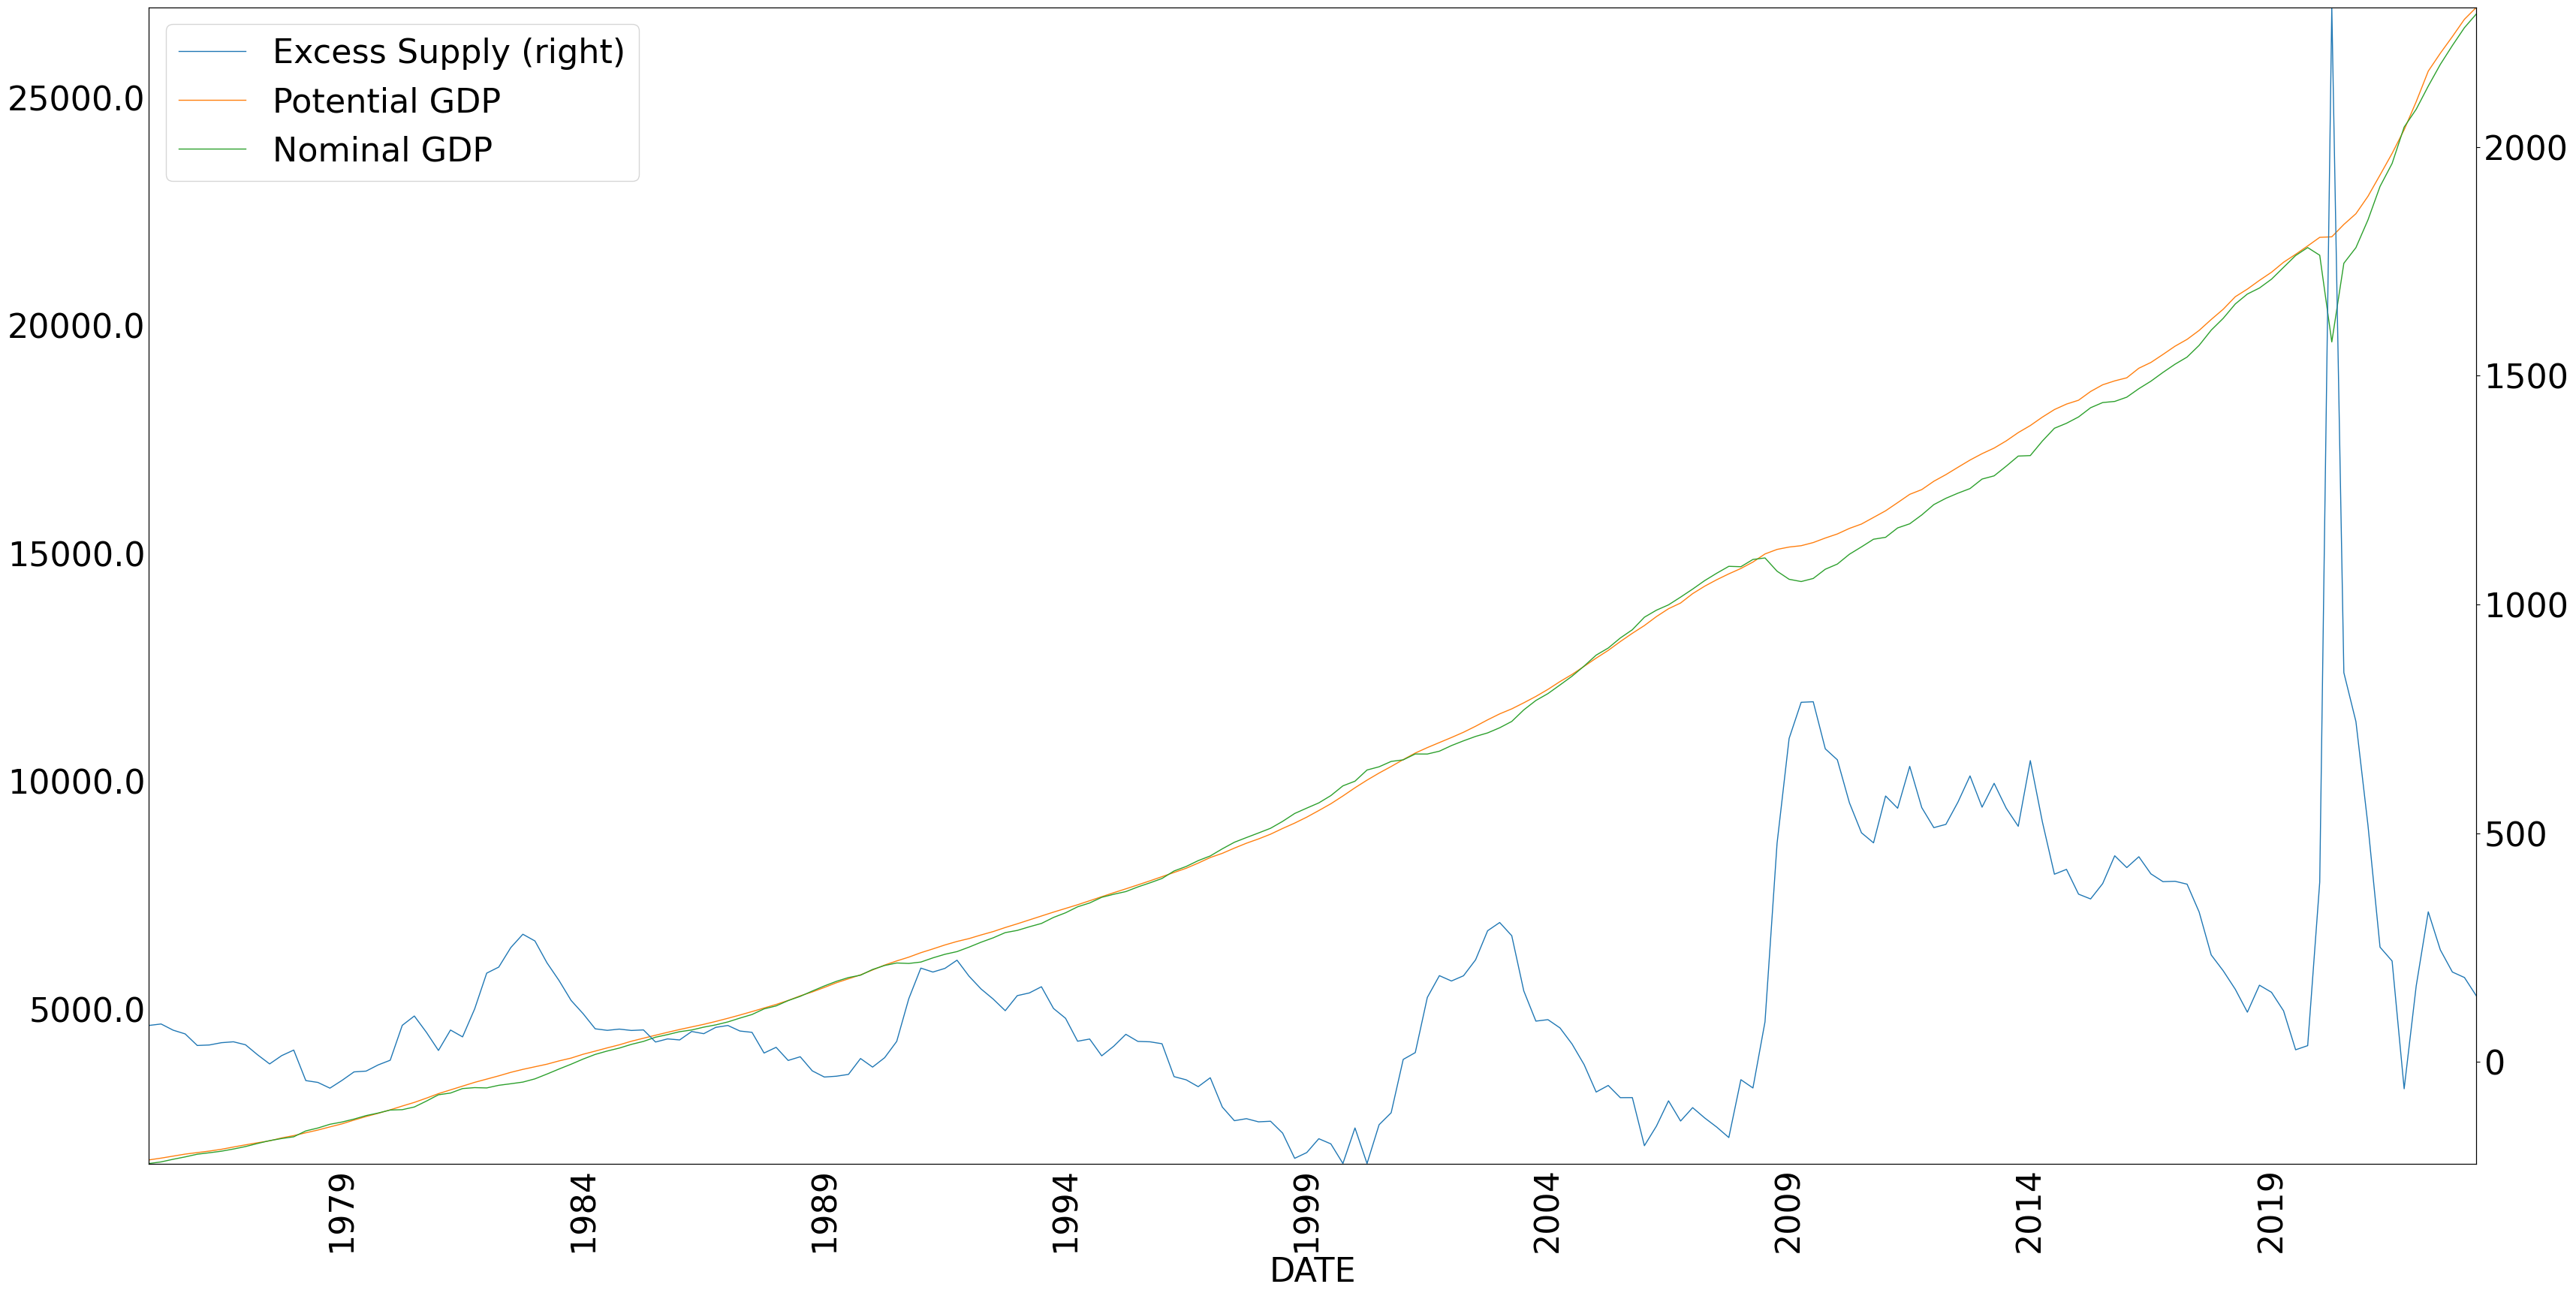

In [3]:
from datlib.plots import *
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
# a negative excess supply of goods is an excess demand for goods
# Potential GDP approximates LRAS
# Nominal (observed) GDP is our estimate of aggregate demand
data["Excess Supply"] = data["Potential GDP"].sub(data["Nominal GDP"])
data_to_plot = data[["Excess Supply", "Potential GDP", "Nominal GDP"]]
plot_lines(data_to_plot, secondary_y = "Excess Supply")

## Next, as example, I will calculate the excess supply using logged values.

In [4]:
# Use a for loop to create logged values
# data_codes.keys() will call the variable names 
# we defined at the beginning of the assignment
# you can perform a similar operation to create 
# log-differenced values
for name in data_codes.keys():
    data["Log "+name] = np.log(data[name])

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


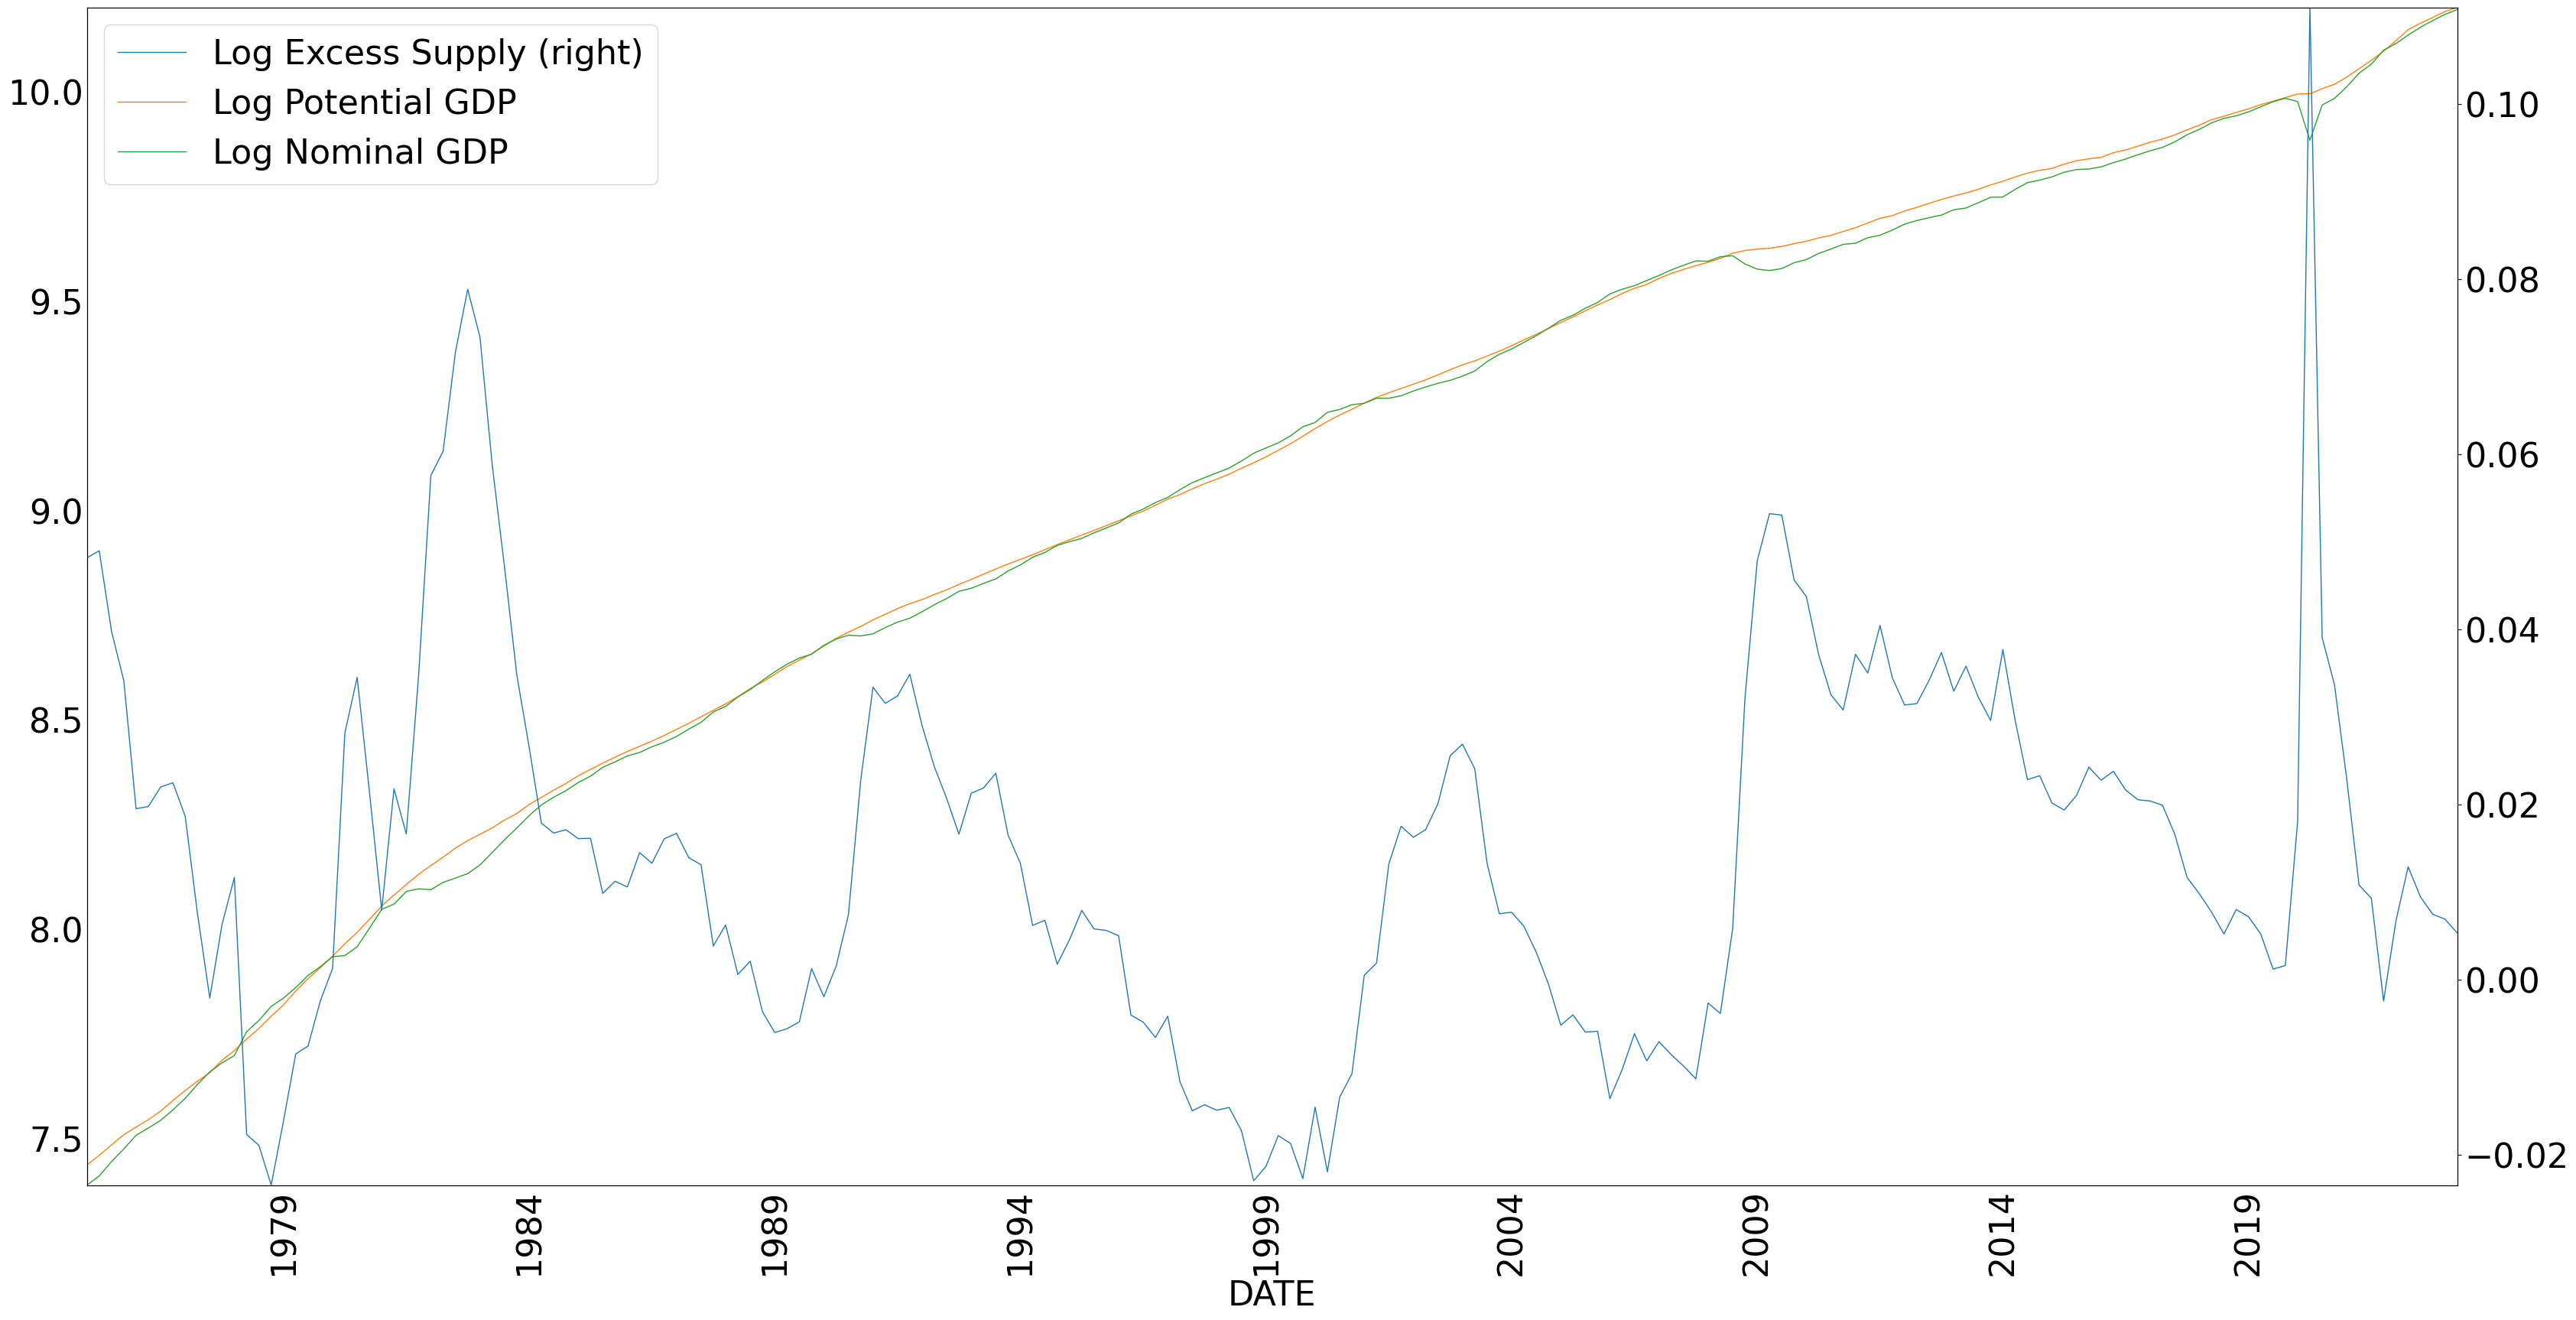

In [5]:
data["Log Excess Supply"] = data["Log Potential GDP"].sub(data["Log Nominal GDP"])
data_to_plot = data[["Log Excess Supply", "Log Potential GDP", "Log Nominal GDP"]]
plot_lines(data_to_plot, secondary_y = "Log Excess Supply")

2.	Calculate Real Excess Supply of or Demand for Goods using calculation similar to those used in questions 1. Plot these values. Indicate whether positive (negative) values represent an excess supply of goods or excess demand for goods.

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


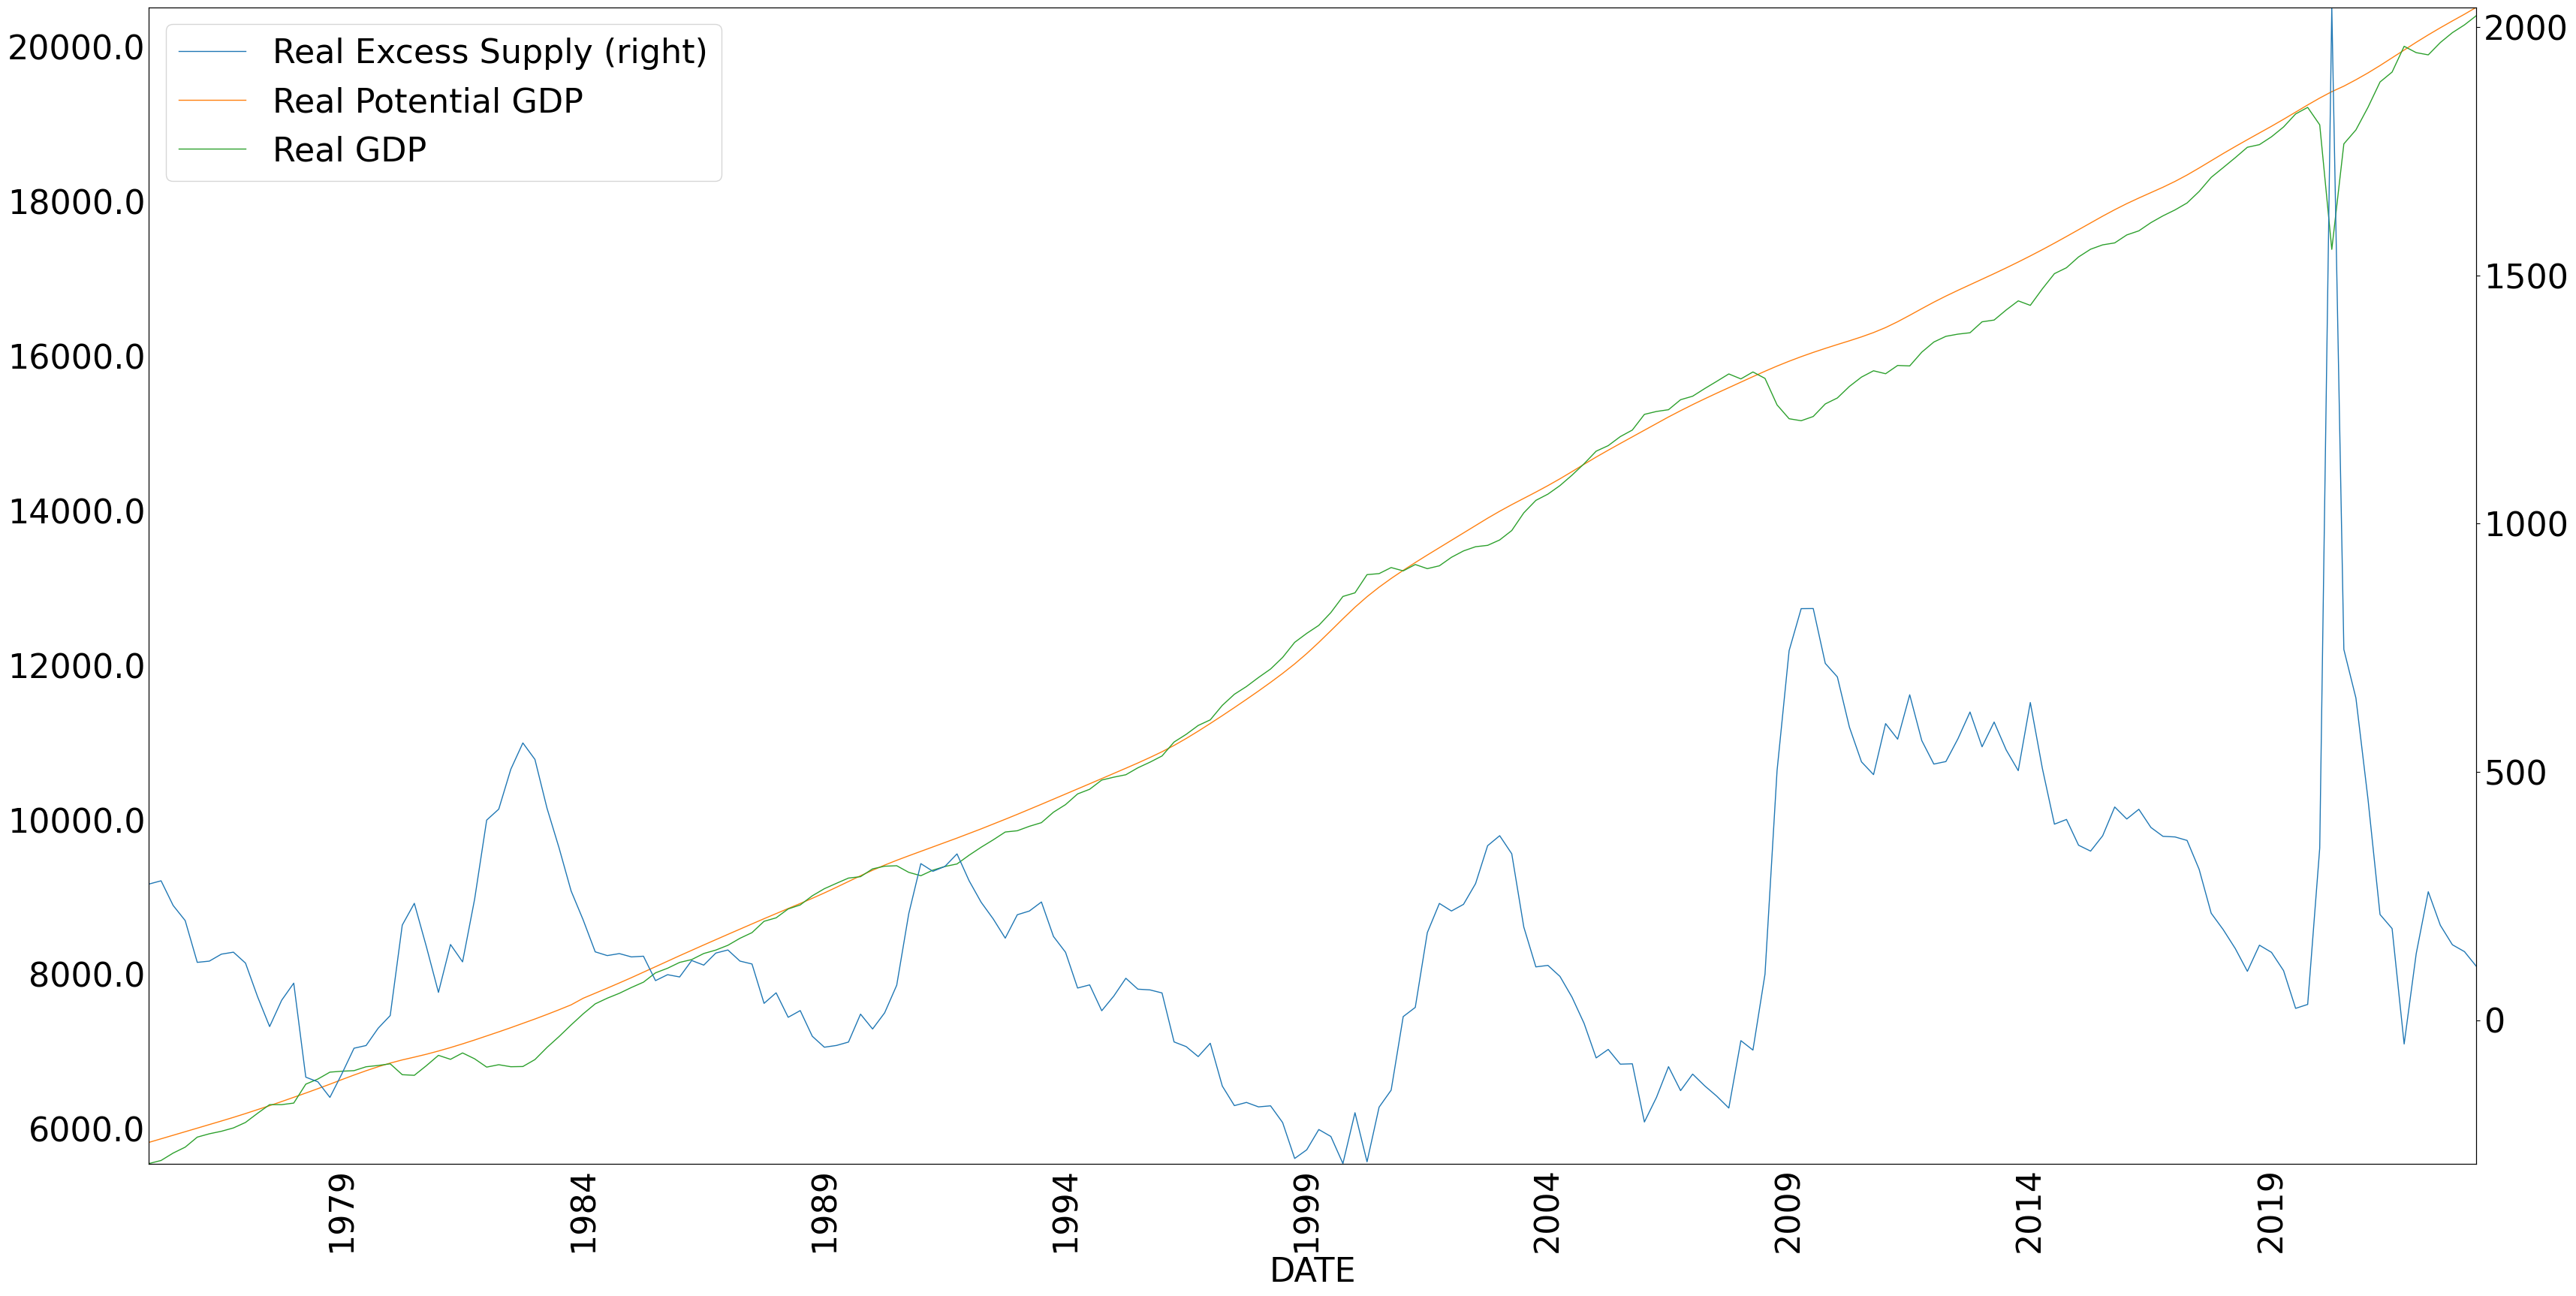

In [6]:
# a negative excess supply of goods is an excess demand for goods
# Potential GDP approximates LRAS
# Nominal (observed) GDP is our estimate of aggregate demand
data["Real Excess Supply"] = data["Real Potential GDP"].sub(data["Real GDP"])
data_to_plot = data[["Real Excess Supply", "Real Potential GDP", "Real GDP"]]
plot_lines(data_to_plot, secondary_y = "Real Excess Supply")

3.	Calculate the logged-difference for each variable Real Potential GDP, Potential GDP, Real GDP, and Nominal GDP. 

4.	Using rates instead of observed values, calculate Excess Demand of or Excess Supply of Goods.

5.	Using rates instead of observed values, calculate Real Excess Demand of or Real Excess Supply of Goods.

6.	Calculate government spending as a percent of Nominal GDP and plot this new variable. How has this variable changed over the last several decades?